# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name:Ramya Madhuri Desineedi

EID: rd32895

Name:Soumya Nayak

EID:sn25829

# Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:


To get decision rule for 'Reject', below conditions needs to be satisfied:

Condition 1: (based on Predicted class C1):
$$(0\times P(C_{1}|x))+(4\times(1-P(C_{1}|x))) > 1$$
$$\ P(C_{1}|x) < 0.75$$

Condition 2: (based on Predicted class C2):
$$(2\times P(C_{1}|x))+(0\times(1-P(C_{1}|x))) > 1$$
$$\ P(C_{1}|x) > 0.50$$

Decision rule for  𝐶1 ,  𝐶2  and  𝑅𝑒𝑗𝑒𝑐𝑡 are: 

C1 if $P(C_{1}|x) \geq  0.75$

C2 if $P(C_{1}|x) \leq 0.5$

Reject if $0.5 < P(C_{1}|x) < 0.75$



# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [1]:
import numpy as np

x1 = np.random.uniform(low=-7.5, high=7.5, size=300)
x2 = np.random.uniform(low=-7.5, high=7.5, size=300)

y_fn = (0.3*x1**2 + 0.8*x2**2) <10

from matplotlib import pyplot as plt

X_train = np.column_stack([x1, x2])
y_train = y_fn
print("Train: ", X_train.shape)

x1 = np.random.uniform(low=-7.5, high=7.5, size=100)
x2 = np.random.uniform(low=-7.5, high=7.5, size=100)
y_fn = (0.3*x1**2 + 0.8*x2**2) <10

X_test = np.column_stack([x1, x2])
y_test = y_fn
print("Test: ", X_test.shape)

X_train = X_train + np.random.random(size=X_train.shape)/10
X_test = X_test + np.random.random(size=X_test.shape)/10

Train:  (300, 2)
Test:  (100, 2)


## Answer:

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [2]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

 p(A, B, C, D, E, F) = p(F | D, E, C)* p(E | B)* p(C | E, A) * p(D | B) * p(B | A) * p(A)

## Answer:


# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

In [3]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# Breast cancer dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

# Random Forest

In [4]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train,y_train)

y_pred_rf=clf_rf.predict(X_test)

In [5]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
rf_accuracy_test = metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))


Accuracy: 0.9680851063829787


In [6]:
feature_imp = pd.Series(clf_rf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

mean concave points        0.139638
worst concave points       0.136108
worst perimeter            0.113511
worst area                 0.091729
worst radius               0.074598
mean concavity             0.072084
worst concavity            0.059597
mean radius                0.046143
mean perimeter             0.037607
area error                 0.035587
mean area                  0.032382
radius error               0.020109
worst texture              0.018000
mean texture               0.016016
worst compactness          0.015127
worst symmetry             0.012980
worst smoothness           0.009593
mean compactness           0.008732
mean smoothness            0.006893
perimeter error            0.006651
concavity error            0.006107
concave points error       0.005928
mean fractal dimension     0.005253
fractal dimension error    0.005232
compactness error          0.004815
smoothness error           0.004689
symmetry error             0.004549
texture error              0

No handles with labels found to put in legend.


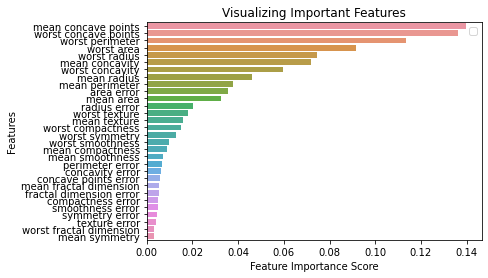

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

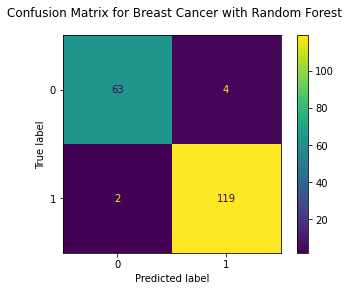

In [8]:
from sklearn.metrics import plot_confusion_matrix
fig=plot_confusion_matrix(clf_rf, X_test, y_test, display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for Breast Cancer with Random Forest")
plt.show()

# MLP

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [10]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [11]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred_mlp=clf_mlp.predict(X_testscaled)
mlp_accuracy_test = metrics.accuracy_score(y_test, y_pred_mlp)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mlp))


Accuracy: 0.9680851063829787


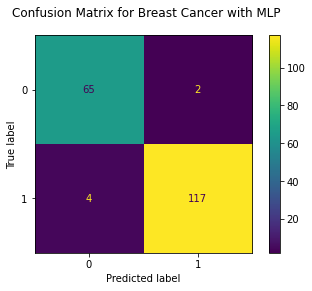

In [12]:
fig=plot_confusion_matrix(clf_mlp, X_testscaled, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for Breast Cancer with MLP")
plt.show()

# Logistic Regression

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred_lr=logreg.predict(X_test)

/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
lr_accuracy_test = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9627659574468085


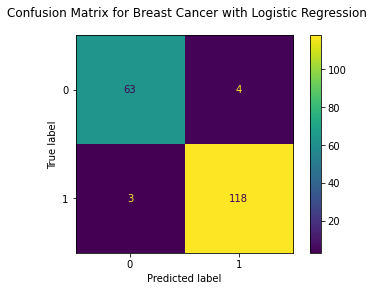

In [15]:
fig=plot_confusion_matrix(logreg, X_test, y_test,display_labels=["0","1"])
fig.figure_.suptitle("Confusion Matrix for Breast Cancer with Logistic Regression")
plt.show()

In [16]:
labels = ["Randome Forest", "MLP", "Logistic Regression"]
Test_accuracies = ["rf_accuracy_test", "mlp_accuracy_test","lr_accuracy_test"]
df = pd.DataFrame(Test_accuracies, columns =labels)

ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

# Calibration Curves

In [17]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

ImportError: cannot import name 'CalibrationDisplay' from 'sklearn.calibration' (/Users/ramya/opt/anaconda3/lib/python3.8/site-packages/sklearn/calibration.py)

In [18]:
pip install CalibrationDisplay

ERROR: Could not find a version that satisfies the requirement CalibrationDisplay (from versions: none)
ERROR: No matching distribution found for CalibrationDisplay
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

clf_isotonic = CalibratedClassifierCV(clf_rf, method='isotonic')
clf_isotonic.fit(X_train, y_train)

# Predict Probabilities
prob_rf = clf_isotonic.predict_proba(X_test)
 
# Creating Calibration Curve
x, y = calibration_curve(y_test, prob_rf, n_bins = 10, normalize = True)

 
# Plot calibration curve
 
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Random Forest')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()